In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy import stats
from itertools import product as prod
%load_ext autoreload
%autoreload 2


from constants_of_experiments import *
from noise_models_and_integration import *
from get_data import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
(train_input, train_target, test_input, test_target) = get_data(train_set_size,
                                                                    test_set_size,
                                                                    model_dim)

In [31]:
for gamma in [0.8]:
    for alpha in list_alphas:
        print(gamma)
        print(alpha)
        data = np.load("results/eff_fid_lstm/dim_{}/statistic_{}_gam_{}_alpha_{}.npz".format(model_dim,
                                                                                                         noise_name,
                                                                                                         gamma,
                                                                                                         alpha))['arr_0']

        data = data[()]
        a = []
        for i in range(10):
            a.append(data[i])
        print(np.mean(a))

0.8
0.0
0.862196
0.8
0.2
0.904486
0.8
0.5
0.90923
0.8
0.8
0.954475


In [10]:
dane = np.load("results/NN_as_approx/dim_{}/{}_gam_{}_alpha_{}_epsilon_1e-{}.npz".format(model_dim,
                                                                                        noise_name,
                                                                                        gamma,
                                                                                        alpha,
                                                                                        eps_order))["arr_0"]
np.shape(dane)

(32, 2, 1000)

In [11]:
def sieve_data(data):   
    tmpdata = []
    for i in range(np.shape(data)[2]):
        if not((data[:,:,i] <0).any()) and (data[:,:,i] >0).any():
            tmpdata.append(data[:,:,i])

    print(len(tmpdata))
    data = np.zeros((np.shape(data)[0],np.shape(data)[1],len(tmpdata)))
    for i in range(len(tmpdata)):
        data[:,:,i] = tmpdata[i]
    return data

data = sieve_data(dane)

852


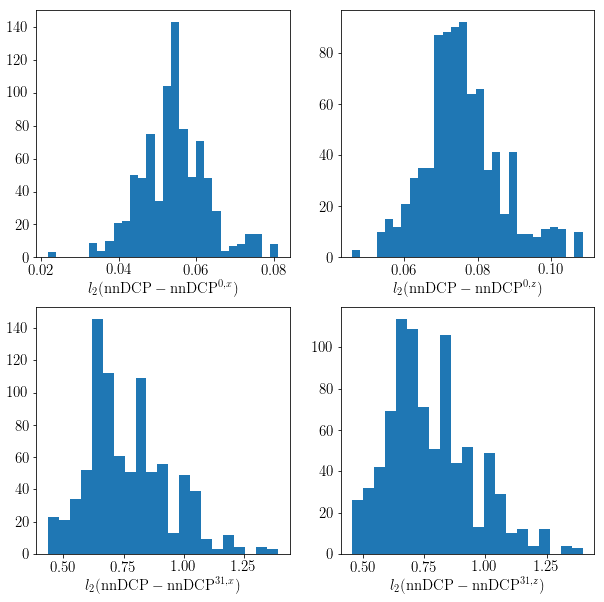

In [12]:
plt.rc("text", usetex=True)
my_font_size = 15
#PyPlot.rc("font", family="serif")

plt.rc("text.latex", unicode=True)
fig = plt.figure()
fig.set_size_inches(10, 10)



plt.subplot(2,2,1)
plt.hist(data[0,0], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{0,x})$', fontsize=my_font_size)

plt.subplot(2,2,2)
plt.hist(data[0,1], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{0,z})$', fontsize=my_font_size)

plt.subplot(2,2,3)
plt.hist(data[31,0], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{31,x})$', fontsize=my_font_size)

plt.subplot(2,2,4)
plt.hist(data[31,1], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{31,z})$', fontsize=my_font_size)
# plt.savefig("../txt/LSTM_approx/histograms_{}_eps_e-{}.pdf".format(noise_name,eps_order))
plt.show()

In [17]:
kruskal = np.zeros((64,64))
for i,j in prod(range(n_ts),range(n_ts)):
    for k,l in prod([0,1],[0,1]):
        kruskal[i+k*32,j+l*32] = stats.kruskal(data[i,k],data[j,l])[1]

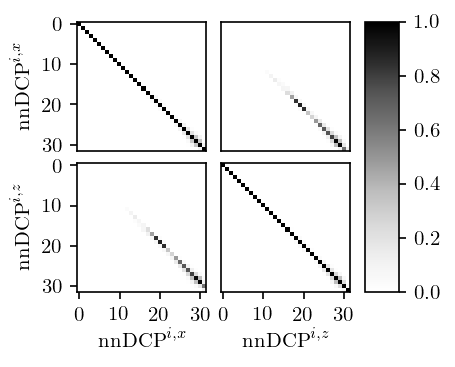

In [18]:
plt.rc("text", usetex=True)
my_font_size =10
#PyPlot.rc("font", family="serif")

my_cmap = plt.cm.Greys

plt.rc("text.latex", unicode=True)
fig = plt.figure(dpi=150)
fig.set_size_inches(3 ,3)
plt.subplot(2,2,1)
plt.imshow(kruskal[:32,:32], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.ylabel(r'$ \textrm{nnDCP}^{i,x}$', fontsize=my_font_size)
plt.tick_params(labelsize = my_font_size)
plt.xticks([])
plt.yticks([0,10,20,30])
plt.subplot(2,2,2)
plt.imshow(kruskal[:32,32:], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(kruskal[32:,:32], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.ylabel(r'$ \textrm{nnDCP}^{i,z}$', fontsize=my_font_size)
plt.xlabel(r'$ \textrm{nnDCP}^{i,x}$', fontsize=my_font_size)
plt.tick_params(labelsize = my_font_size)
plt.yticks([0,10,20,30])
plt.xticks([0,10,20,30])
plt.subplot(2,2,4)
plt.imshow(kruskal[32:,32:], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=-0.1)
plt.xlabel(r'$\textrm{nnDCP}^{i,z}$', fontsize=my_font_size)
plt.tick_params(labelsize = my_font_size)
plt.yticks([])
plt.xticks([0,10,20,30])
plt.subplots_adjust(bottom=0.2, right=0.8, top=0.8)
cax = plt.axes([0.8, 0.2, 0.075, 0.6])
plt.tick_params(labelsize = my_font_size)
c = plt.colorbar(cax=cax)
# c.set_label(r'$p$--\textrm{value}', fontsize=my_font_size,rotation=270)

# plt.savefig("../txt/LSTM_approx/kruskal_mtx_plot_{}_eps_e-{}.pdf".format(noise_name,eps_order))
plt.show()